## Descarga de los CSV

In [2]:
!wget -q -O Fake.csv https://raw.githubusercontent.com/jeffersonlicet/DH-D1/master/data/Fake.csv
!wget -q -O True.csv https://raw.githubusercontent.com/jeffersonlicet/DH-D1/master/data/True.csv

In [73]:
import pandas as pd

fake = pd.read_csv('Fake.csv')
fake['label'] = 1
real = pd.read_csv('True.csv')
real['label'] = 0

df = pd.concat([fake, real], axis=0)

# Exploración

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
total_entradas = len(df)

## Vemos si el dataset está balanceado:

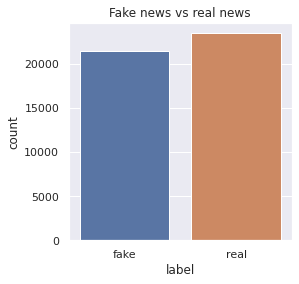

In [58]:
plt.figure(figsize=(4, 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="label", data=df)
ax.set(xticklabels=['fake', 'real'])
plt.title("Fake news vs real news");

## Veamos si existen entradas duplicadas

## Entradas duplicadas por título

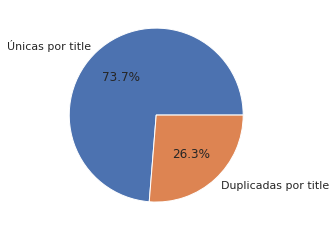

In [64]:
unique_q = df.groupby(["title", 'label']).filter(lambda x: len(x) == 1)
duplicate_q = df.groupby(["title", 'label']).filter(lambda x: len(x) > 1)
matplotlib.pyplot.pie((len(unique_q)*100/total_entradas, len(duplicate_q)*100/total_entradas),
                            labels=['Únicas por title', 'Duplicadas por title'],
                            autopct='%1.1f%%');                        

## Entradas duplicadas por texto

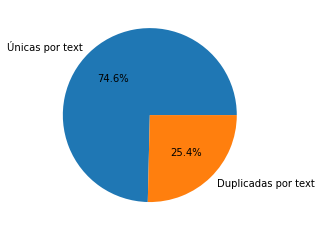

In [6]:
unique_q = df.groupby(["text", 'label']).filter(lambda x: len(x) == 1)
duplicate_q = df.groupby(["text", 'label']).filter(lambda x: len(x) > 1)
matplotlib.pyplot.pie((len(unique_q)*100/total_entradas, len(duplicate_q)*100/total_entradas),
                            labels=['Únicas por text', 'Duplicadas por text'],
                            autopct='%1.1f%%');

## Entradas duplicadas por título y texto

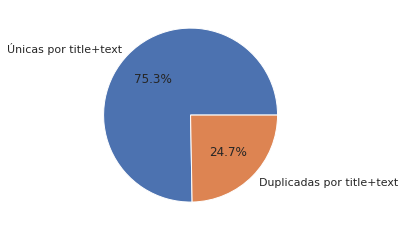

In [65]:
unique_q = df.groupby(['text', 'title', 'label']).filter(lambda x: len(x) == 1)
duplicate_q = df.groupby(['text', 'title', 'label']).filter(lambda x: len(x) > 1)
matplotlib.pyplot.pie((len(unique_q)*100/total_entradas, len(duplicate_q)*100/total_entradas),
                            labels=['Únicas por title+text', 'Duplicadas por title+text'],
                            autopct='%1.1f%%');

## Veamos la distribución de caracteres y palabras

## Por titulo


In [8]:
from nltk.tokenize import WordPunctTokenizer

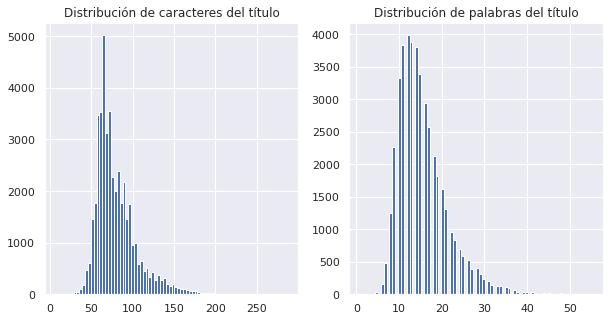

In [66]:
tokenizer = WordPunctTokenizer()

df['length'] = df['title'].apply(len)
df['length_tokens'] = df['title'].apply(lambda x : len(tokenizer.tokenize(x)))

fig, axes = matplotlib.pyplot.subplots(figsize=(10, 5), nrows=1, ncols=2)

df['length'].hist(bins=80, ax=axes[0]);
df['length_tokens'].hist(bins=80, ax=axes[1]);

axes[0].title.set_text('Distribución de caracteres del título');
axes[1].title.set_text('Distribución de palabras del título');

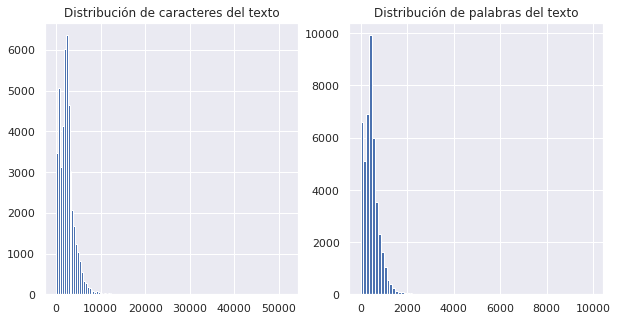

In [67]:
tokenizer = WordPunctTokenizer()

df['length'] = df['text'].apply(len)
df['length_tokens'] = df['text'].apply(lambda x : len(tokenizer.tokenize(x)))

fig, axes = matplotlib.pyplot.subplots(figsize=(10, 5), nrows=1, ncols=2)

df['length'].hist(bins=121, ax=axes[0]);
df['length_tokens'].hist(bins=80, ax=axes[1]);

axes[0].title.set_text('Distribución de caracteres del texto');
axes[1].title.set_text('Distribución de palabras del texto');

## Palabras más frecuentes y menos frecuentes

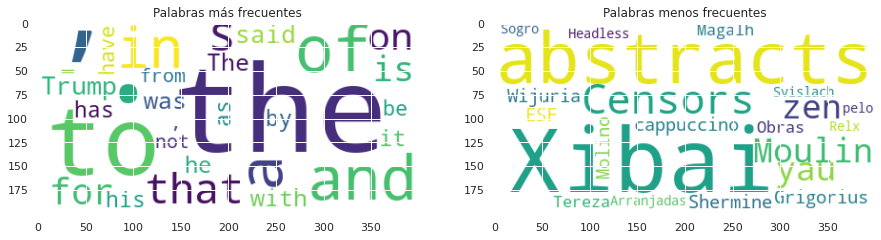

In [68]:
from wordcloud import WordCloud

from collections import Counter
df['texto'] = df['title'] + " " + df['text']
df['tokens'] = df['texto'].apply(lambda x : tokenizer.tokenize(x))
dic = Counter()

for tokens in df.tokens.values:
  dic.update(tokens)

def getWordcloud(data):
  return WordCloud(background_color ='white', min_font_size = 10).generate_from_frequencies(data)

wordcloud1 = getWordcloud(dict(dic.most_common(30)))
wordcloud2 = getWordcloud(dict(dic.most_common()[-30:]))

fig, axes = matplotlib.pyplot.subplots(figsize=(15, 15), nrows=1, ncols=2)
axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[1].imshow(wordcloud2, interpolation='bilinear')

axes[0].title.set_text('Palabras más frecuentes')
axes[1].title.set_text('Palabras menos frecuentes')

# Utilizar herramientas avanzadas para conocer la relación entre las palabras (palabras similares)

In [39]:
import gensim
model_words = gensim.models.FastText(sentences=df.tokens.values, min_count=5, max_vocab_size=7000,size=32, workers=3, window=5, sg=1)

In [41]:
model_words.wv.most_similar('trump', topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Donald', 0.8412610292434692),
 ('Trump', 0.831047773361206),
 ('realDonaldTrump', 0.7985457181930542),
 ('J', 0.7343674898147583),
 ('..', 0.7283753156661987)]

In [42]:
model_words.wv.most_similar('FBI', topn=5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Comey', 0.9263573884963989),
 ('investigation', 0.8808145523071289),
 ('Mueller', 0.8656626343727112),
 ('Counsel', 0.8431780338287354),
 ('probe', 0.8418172597885132)]

In [43]:
model_words.wv.most_similar('Reuters', topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(')', 0.8624123334884644),
 ('(', 0.8493596911430359),
 ('Danish', 0.8220593333244324),
 ('LONDON', 0.8085521459579468),
 (':', 0.8042778968811035),
 ('German', 0.7992177605628967),
 ('/', 0.7882556915283203),
 ('BERLIN', 0.7821067571640015),
 ('Turkish', 0.7653628587722778),
 ('An', 0.7514615058898926)]

In [44]:
model_words.wv.most_similar('news', topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('conference', 0.8715839385986328),
 ('agency', 0.8606261014938354),
 ('daily', 0.852066159248352),
 ('Press', 0.8325645923614502),
 ('site', 0.8233572840690613),
 ('media', 0.8129943013191223),
 ('network', 0.8121742606163025),
 ('television', 0.7984781265258789),
 ('CNN', 0.7938896417617798),
 ('reported', 0.7866588234901428)]

In [45]:
model_words.wv.most_similar('breaking', topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('set', 0.8412601351737976),
 ('opened', 0.8203195333480835),
 ('open', 0.8134452700614929),
 ('putting', 0.8118317723274231),
 ('holding', 0.8117724657058716),
 ('line', 0.8103126287460327),
 ('closed', 0.8086323738098145),
 ('turning', 0.8075773119926453),
 ('put', 0.8002361059188843),
 ('broke', 0.7959036231040955)]

## Palabras comunes usando un Counter()

In [75]:
from itertools import chain

splited = df['text'].str.split()
counter_words = Counter(list(chain(*splited)))
counter_frame = pd.DataFrame(data=counter_words, index=['count'])
top_common_words = counter_frame.T.sort_values(by=['count'], ascending=False).reset_index()
top_common_words.head(20)

,index,count
0,the,905825
1,to,529815
2,of,437532
3,and,392470
4,a,390084
5,in,322378
6,that,220928
7,on,181758
8,s,172259
9,for,166256


## Sobre otras columnas (subject)

In [77]:
df_subjects = df.groupby(['subject', 'label'])['text'].count()
df_subjects

subject          label
Government News  1         1570
Middle-east      1          778
News             1         9050
US_News          1          783
left-news        1         4459
politics         1         6841
politicsNews     0        11272
worldnews        0        10145
Name: text, dtype: int64

# Posibles conclusiones



*   El dataset está balanceado
*   Hay que eliminar stop words frecuentes
*   Hay que eliminar las palabras menos frecuentes
*   Los textos tienen como máximo 2000 palabras
*   Los títulos tienen como máximo 40 palabras
*   Subject divide exactamente en fake o real el dataset
*   Las palabras más frecuentes son stopwords